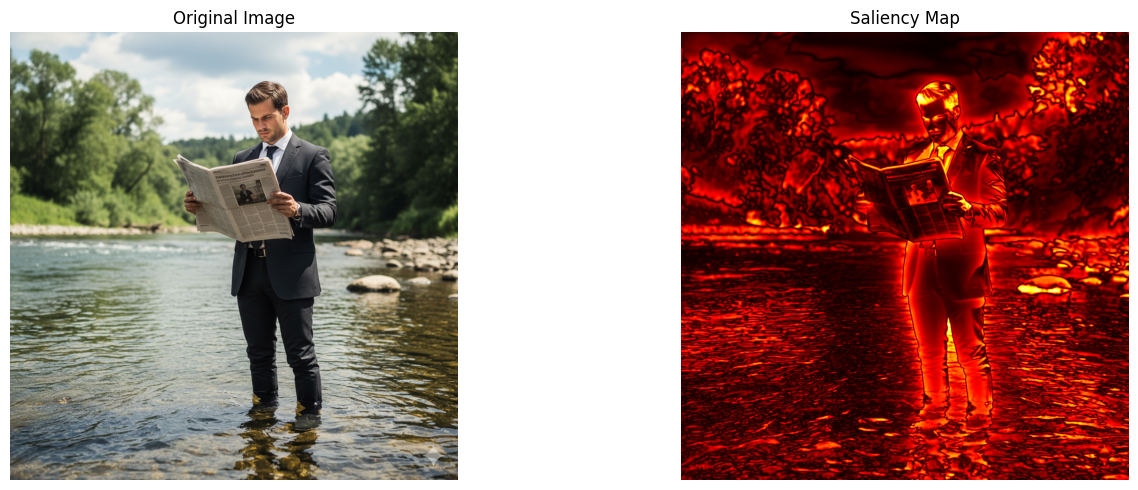

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "Domain_1_Images/img_004.png"  
image = cv2.imread(image_path)
if image is None:
    raise ValueError("Could not read the image. Check the file path.")
    
# Convert to RGB for display
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Initialize OpenCV’s fine-grained saliency detector
saliency = cv2.saliency.StaticSaliencyFineGrained_create()

# Compute saliency map
(success, saliency_map) = saliency.computeSaliency(image)

# Normalize for visualization
saliency_map = (saliency_map * 255).astype("uint8")

# Threshold the saliency map to get binary mask of salient region
thresh_map = cv2.threshold(saliency_map, 0, 255,
                           cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

# Find contours of the salient region
contours, _ = cv2.findContours(thresh_map, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw bounding box around largest salient region
if contours:
    max_contour = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(max_contour)
    saliency_zone = image_rgb[y:y+h, x:x+w]
else:
    saliency_zone = image_rgb  # fallback if no contours found

# Visualization
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Saliency Map")
plt.imshow(saliency_map, cmap='hot')
plt.axis('off')

plt.tight_layout()
plt.show()


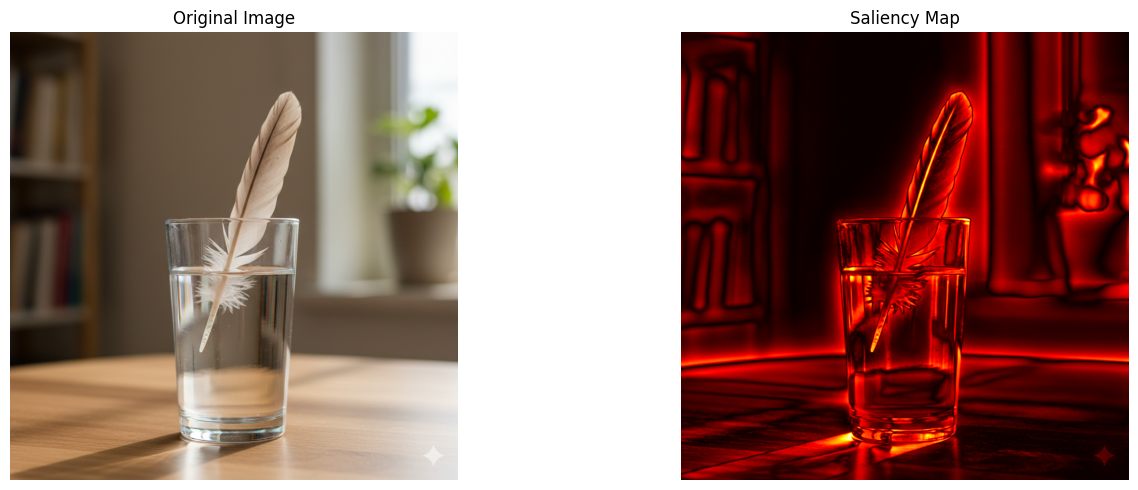

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "Domain_5_Images/img_173.png"  
image = cv2.imread(image_path)
if image is None:
    raise ValueError("Could not read the image. Check the file path.")
    
# Convert to RGB for display
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Initialize OpenCV’s fine-grained saliency detector
saliency = cv2.saliency.StaticSaliencyFineGrained_create()

# Compute saliency map
(success, saliency_map) = saliency.computeSaliency(image)

# Normalize for visualization
saliency_map = (saliency_map * 255).astype("uint8")

# Threshold the saliency map to get binary mask of salient region
thresh_map = cv2.threshold(saliency_map, 0, 255,
                           cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

# Find contours of the salient region
contours, _ = cv2.findContours(thresh_map, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw bounding box around largest salient region
if contours:
    max_contour = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(max_contour)
    saliency_zone = image_rgb[y:y+h, x:x+w]
else:
    saliency_zone = image_rgb  # fallback if no contours found

# Visualization
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Saliency Map")
plt.imshow(saliency_map, cmap='hot')
plt.axis('off')

plt.tight_layout()
plt.show()


In [3]:
from u2net import U2NET  # make sure u2net.py is in same folder
import torch


c:\Users\utsag\Downloads\VisualCuriosityEngine\.venv\Lib\site-packages\torch\nn\_reduction.py:51: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


In [4]:
model = U2NET(3, 1)

state_dict = torch.load(
    "u2net.pth",
    map_location="cpu",
    weights_only=False   # IMPORTANT for PyTorch 2.6+
)

model.load_state_dict(state_dict, strict=False)
model.eval()

print("U²-Net model loaded successfully!")


U²-Net model loaded successfully!


In [5]:
from torchvision import transforms
from PIL import Image
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

transform = transforms.Compose([
    transforms.Resize((320, 320)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])


In [6]:
def predict_saliency(image_path):
    img = Image.open(image_path).convert("RGB")
    inp = transform(img).unsqueeze(0)

    with torch.no_grad():
        outputs = model(inp)

    # outputs = (list_main, list_aux)
    main = outputs[0]

    # final saliency tensor
    d1 = main[0]

    # Resize to original image size
    d1 = F.interpolate(d1, size=img.size[::-1], mode="bilinear", align_corners=False)
    sal = d1.squeeze().cpu().numpy()

    sal = (sal - sal.min()) / (sal.max() - sal.min() + 1e-8)
    return img, sal


c:\Users\utsag\Downloads\VisualCuriosityEngine\Visual-Curiosity-Engine-\u2net.py:77: UserWarning: `nn.functional.upsample` is deprecated. Use `nn.functional.interpolate` instead.
  src = F.upsample(src,size=tar.shape[2:],mode='bilinear')


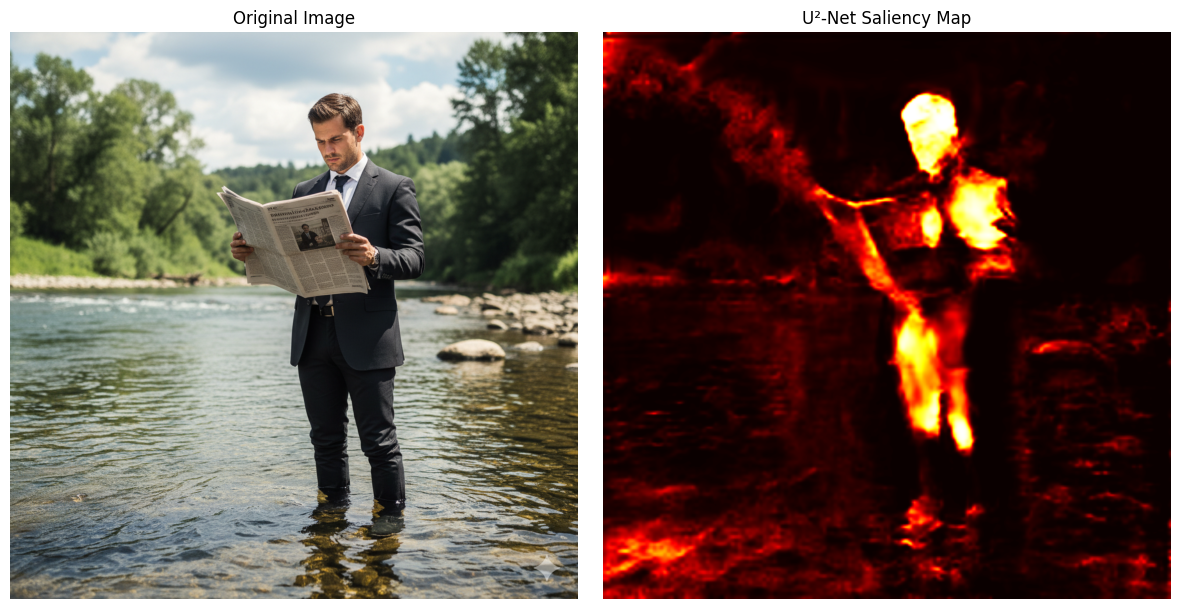

In [7]:
img_path = "Domain_1_Images/img_004.png"  # your input image

orig, saliency = predict_saliency(img_path)

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.imshow(orig)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(saliency, cmap="hot")
plt.title("U²-Net Saliency Map")
plt.axis("off")

plt.tight_layout()
plt.show()


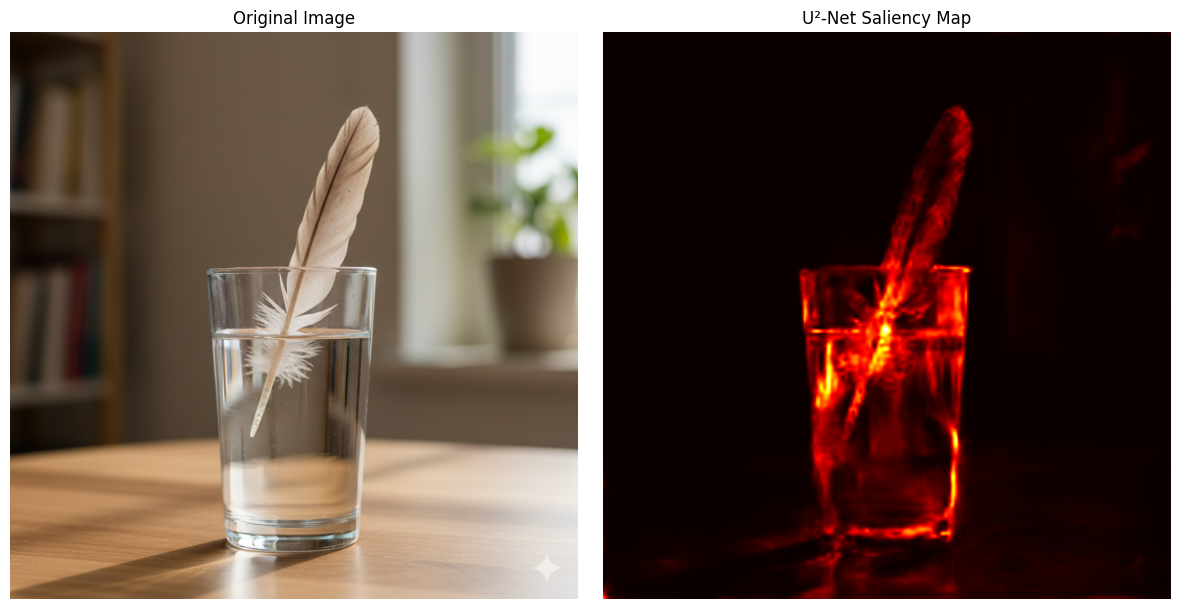

In [8]:
img_path = "Domain_5_Images/img_173.png"  # your input image

orig, saliency = predict_saliency(img_path)

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.imshow(orig)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(saliency, cmap="hot")
plt.title("U²-Net Saliency Map")
plt.axis("off")

plt.tight_layout()
plt.show()


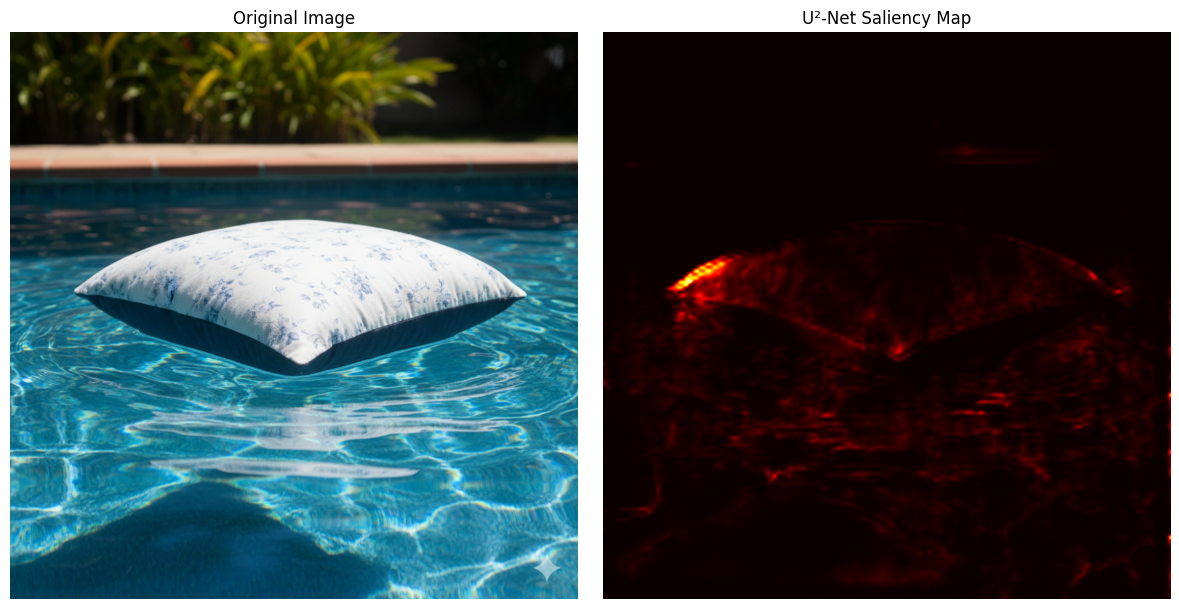

In [9]:
img_path = "Domain_3_Images/img_105.png"  # your input image

orig, saliency = predict_saliency(img_path)

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.imshow(orig)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(saliency, cmap="hot")
plt.title("U²-Net Saliency Map")
plt.axis("off")

plt.tight_layout()
plt.show()
